In [8]:
# Import libraries
import os
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

os.environ["LOKY_MAX_CPU_COUNT"] = str(multiprocessing.cpu_count() // 2)  # Estimate physical cores
os.environ["OMP_NUM_THREADS"] = "1"

# Create a dataset: customer age and income (no labels)
np.random.seed(42)
n = 100
age = np.random.randint(18, 70, n)
income = np.random.uniform(20000, 100000, n)
data = pd.DataFrame({'Age': age, 'Income_USD': income})
data.head()



,Age,Income_USD
0,56,33221.355125
1,69,21250.912539
2,46,53872.118457
3,32,51590.521454
4,60,43479.053977


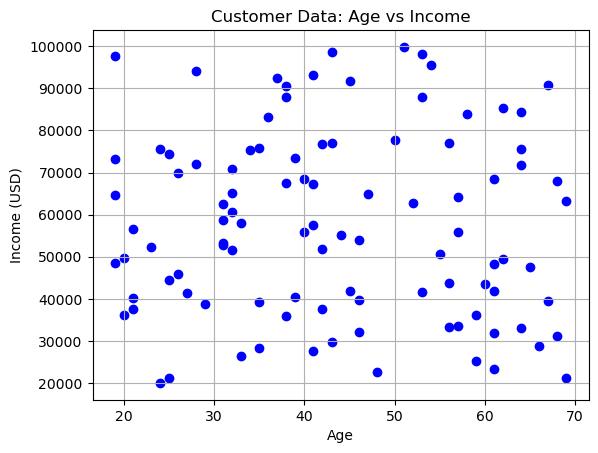

In [10]:
# Plot the data
plt.scatter(data['Age'], data['Income_USD'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income (USD)')
plt.title('Customer Data: Age vs Income')
plt.grid(True)
plt.show()



In [12]:
# Scale the data (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters



C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


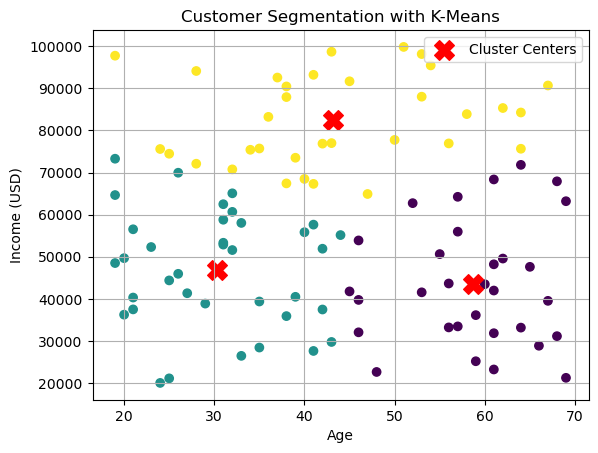

In [14]:
# Plot the clusters
plt.scatter(data['Age'], data['Income_USD'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=200, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Income (USD)')
plt.title('Customer Segmentation with K-Means')
plt.legend()
plt.grid(True)
plt.show()



In [16]:
# Describe the clusters
print("Cluster Descriptions:")
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Income: ${cluster_data['Income_USD'].mean():.0f}")

Cluster Descriptions:
Cluster 0:
  Average Age: 58.7
  Average Income: $43484
Cluster 1:
  Average Age: 30.3
  Average Income: $46931
Cluster 2:
  Average Age: 43.2
  Average Income: $82565
